<a href="https://colab.research.google.com/github/AnandBanoth2004/ML_Project_task/blob/main/ML_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import xgboost as xgb
from sklearn.metrics import mean_squared_error,mean_absolute_error
from xgboost import plot_importance,plot_tree

In [4]:
df=pd.read_csv('Gujrat 2022-23.newlyedited2.csv')

In [5]:
df

,DateTime,Date,Time,Power_MW
0,04-01-2022 00:00,4-1-2022,00:00,90.93
1,04-01-2022 00:15,4-1-2022,00:15,94.97
2,04-01-2022 00:30,4-1-2022,00:30,108.82
3,04-01-2022 00:45,4-1-2022,00:45,112.58
4,04-01-2022 01:00,4-1-2022,01:00,105.05
...,...,...,...,...
35035,03-31-2023 22:45,3-31-2023,22:45,120.56
35036,03-31-2023 23:00,3-31-2023,23:00,120.05
35037,03-31-2023 23:15,3-31-2023,23:15,110.98
35038,03-31-2023 23:30,3-31-2023,23:30,102.69


In [6]:
df = df.set_index('DateTime')

In [7]:
df.index

Index(['04-01-2022 00:00', '04-01-2022 00:15', '04-01-2022 00:30',
       '04-01-2022 00:45', '04-01-2022 01:00', '04-01-2022 01:15',
       '04-01-2022 01:30', '04-01-2022 01:45', '04-01-2022 02:00',
       '04-01-2022 02:15',
       ...
       '03-31-2023 21:30', '03-31-2023 21:45', '03-31-2023 22:00',
       '03-31-2023 22:15', '03-31-2023 22:30', '03-31-2023 22:45',
       '03-31-2023 23:00', '03-31-2023 23:15', '03-31-2023 23:30',
       '03-31-2023 23:45'],
      dtype='object', name='DateTime', length=35040)

In [8]:
df.index = pd.to_datetime(df.index)

In [9]:
df.index

DatetimeIndex(['2022-04-01 00:00:00', '2022-04-01 00:15:00',
               '2022-04-01 00:30:00', '2022-04-01 00:45:00',
               '2022-04-01 01:00:00', '2022-04-01 01:15:00',
               '2022-04-01 01:30:00', '2022-04-01 01:45:00',
               '2022-04-01 02:00:00', '2022-04-01 02:15:00',
               ...
               '2023-03-31 21:30:00', '2023-03-31 21:45:00',
               '2023-03-31 22:00:00', '2023-03-31 22:15:00',
               '2023-03-31 22:30:00', '2023-03-31 22:45:00',
               '2023-03-31 23:00:00', '2023-03-31 23:15:00',
               '2023-03-31 23:30:00', '2023-03-31 23:45:00'],
              dtype='datetime64[ns]', name='DateTime', length=35040, freq=None)

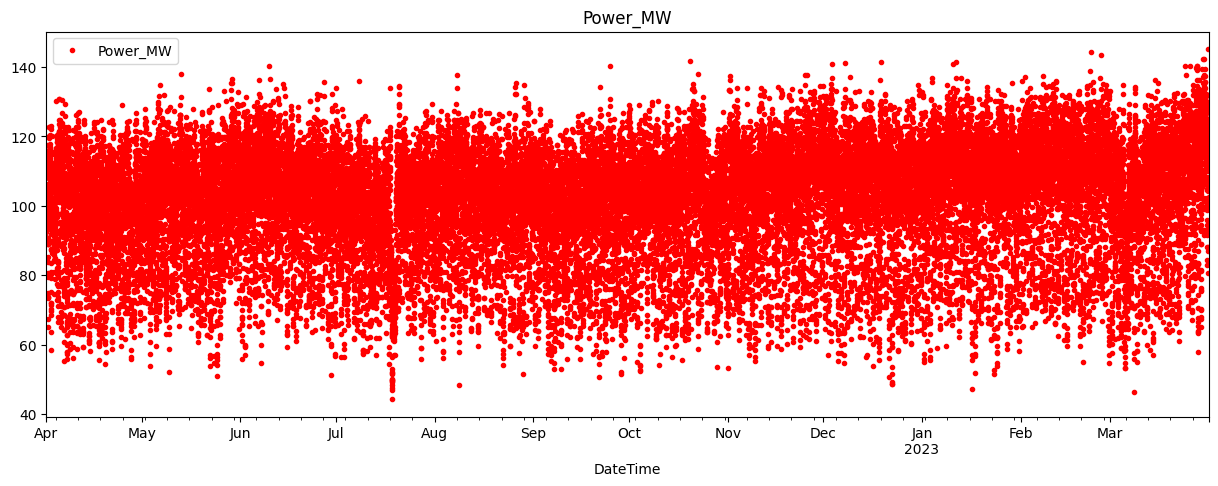

In [10]:
df.plot(style = '.',figsize = (15,5), color ='red', title ='Power_MW')
plt.show()

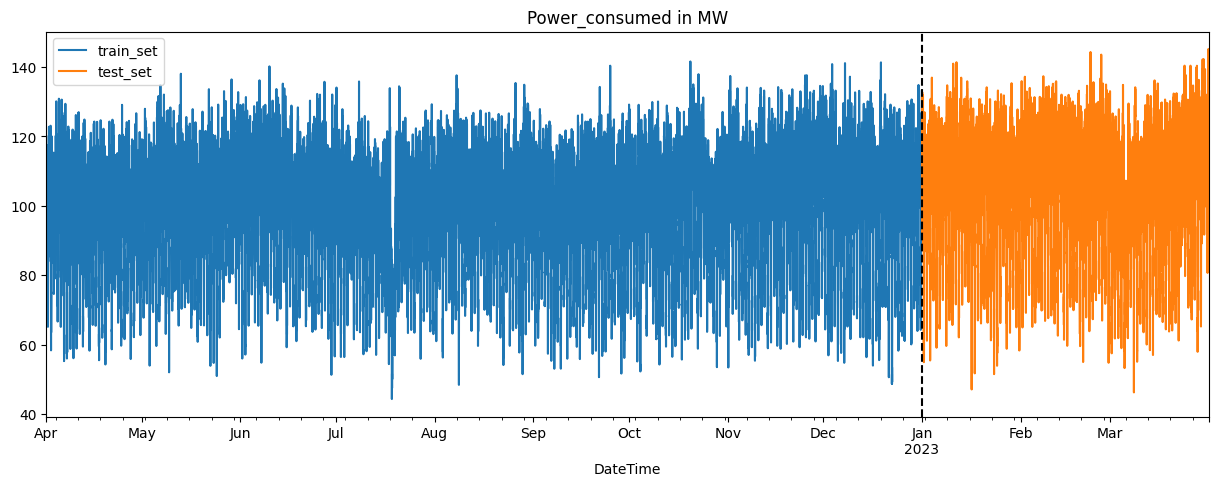

In [11]:
train = df.loc[df.index < '01-01-2023']
test = df.loc[df.index >= '01-01-2023']

fig, ax = plt.subplots(figsize =(15,5))
train.plot(ax=ax, label ='train_set',title ='Power_consumed in MW')
test.plot(ax=ax,label='test_set')
ax.axvline('01-01-2023',ls='--',color='black')
ax.legend(['train_set','test_set'])
plt.show()

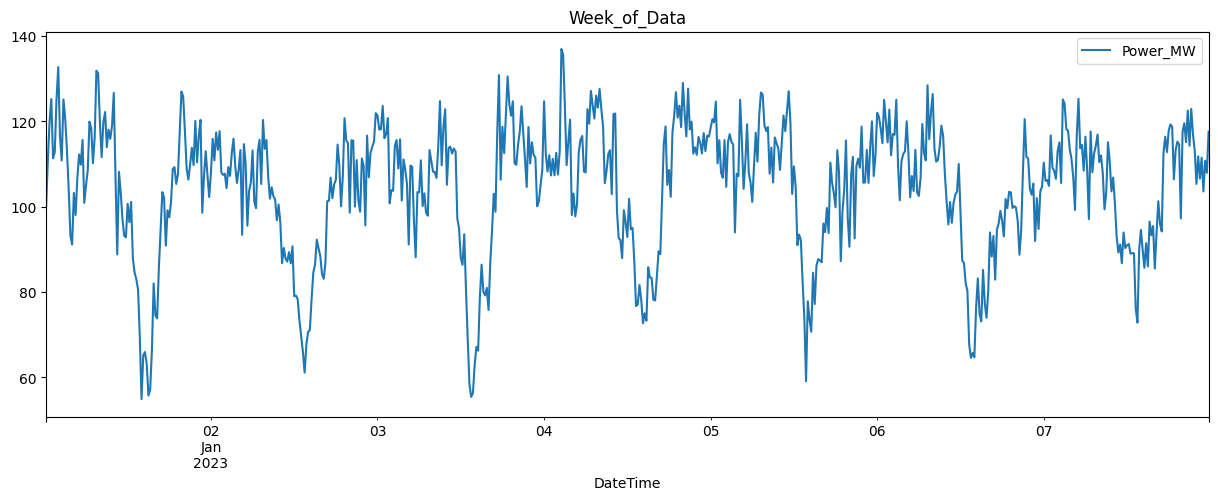

In [12]:
df.loc[(df.index >'01-01-2023')&(df.index <'01-08-2023')].plot(figsize = (15,5),title ='Week_of_Data')
plt.show()

In [13]:
def create_features(df):
    df = df.copy()
    df['hour']=df.index.hour
    df['dayofweek']=df.index.dayofweek
    df['quarter']=df.index.quarter
    df['month']=df.index.month
    df['year']=df.index.year
    df['dayofyear']=df.index.dayofyear
    return df

df = create_features(df)

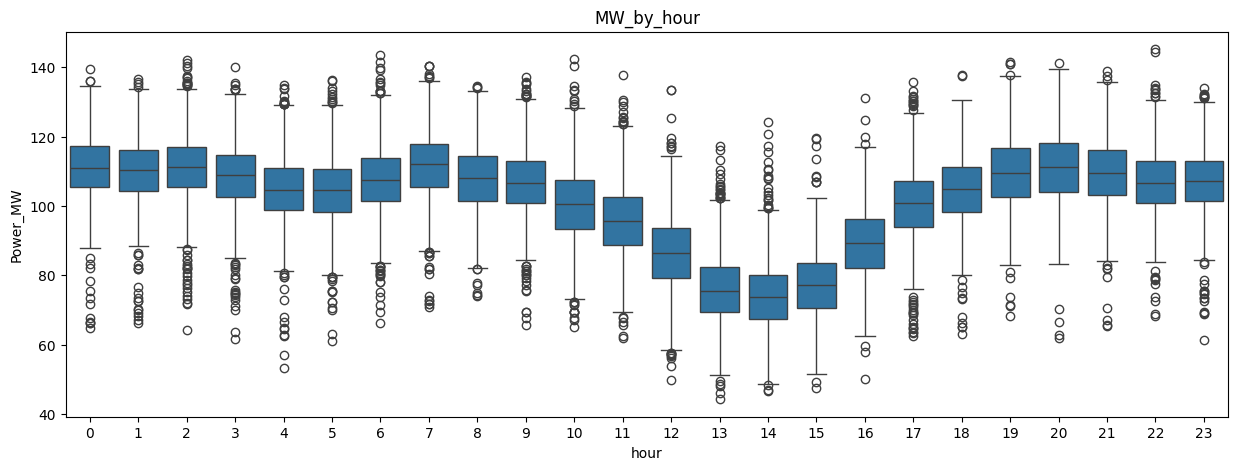

In [14]:
fig, ax = plt.subplots(figsize=(15,5))
sn.boxplot(data=df,x='hour',y='Power_MW')
ax.set_title('MW_by_hour')
plt.show()

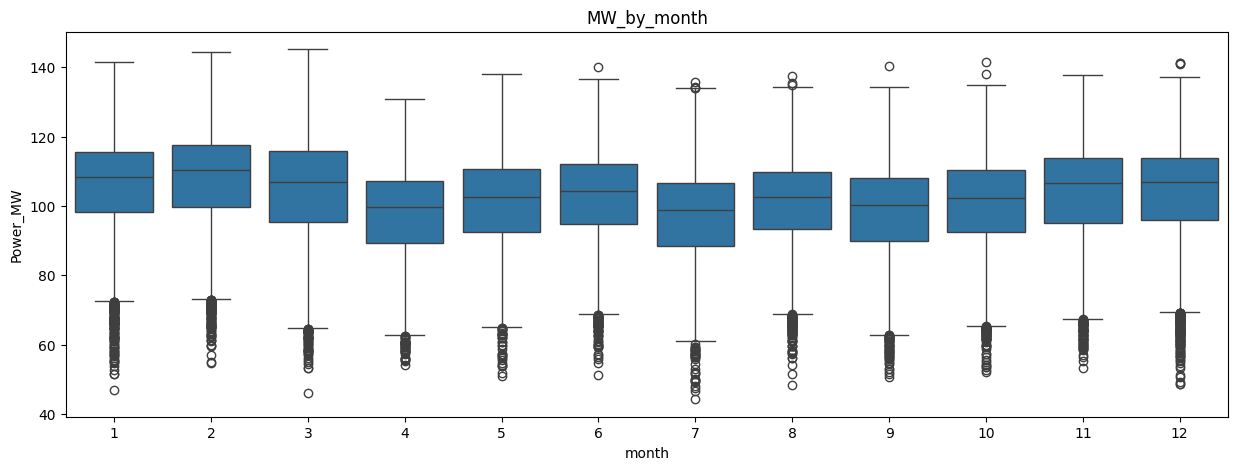

In [15]:
fig, ax = plt.subplots(figsize=(15,5))
sn.boxplot(data=df,x='month',y='Power_MW')
ax.set_title('MW_by_month')
plt.show()

In [16]:
df.columns

Index(['Date', 'Time', 'Power_MW', 'hour', 'dayofweek', 'quarter', 'month',
       'year', 'dayofyear'],
      dtype='object')

In [17]:
train = create_features(train)
test =  create_features(test)

FEATURES = ['hour', 'dayofweek', 'quarter', 'month','year','dayofyear']
TARGET = 'Power_MW'


In [18]:
X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

In [20]:
reg = xgb.XGBRegressor(n_estimators = 1000, early_stopping_rounds = 50)
reg.fit(X_train,y_train,eval_set = [(X_train, y_train), (X_test, y_test)],verbose = False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [21]:
fi = pd.DataFrame(data = reg.feature_importances_,index = reg.feature_names_in_,columns = ['importance'])

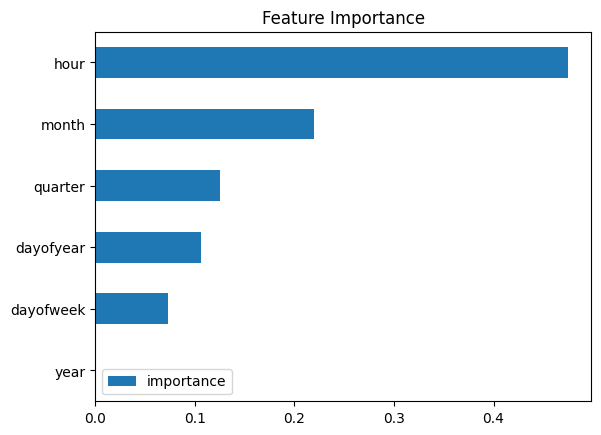

In [22]:
fi.sort_values('importance').plot(kind ='barh', title ='Feature Importance')
plt.show()

In [23]:
#predictions start
test['predictions'] = reg.predict(X_test)

In [24]:
df

,Date,Time,Power_MW,hour,dayofweek,quarter,month,year,dayofyear
DateTime,,,,,,,,,
2022-04-01 00:00:00,4-1-2022,00:00,90.93,0,4,2,4,2022,91
2022-04-01 00:15:00,4-1-2022,00:15,94.97,0,4,2,4,2022,91
2022-04-01 00:30:00,4-1-2022,00:30,108.82,0,4,2,4,2022,91
2022-04-01 00:45:00,4-1-2022,00:45,112.58,0,4,2,4,2022,91
2022-04-01 01:00:00,4-1-2022,01:00,105.05,1,4,2,4,2022,91
...,...,...,...,...,...,...,...,...,...
2023-03-31 22:45:00,3-31-2023,22:45,120.56,22,4,1,3,2023,90
2023-03-31 23:00:00,3-31-2023,23:00,120.05,23,4,1,3,2023,90
2023-03-31 23:15:00,3-31-2023,23:15,110.98,23,4,1,3,2023,90


In [25]:
df = df.merge(test[['predictions']],how ='left', left_index =True,right_index = True)

In [26]:
df

,Date,Time,Power_MW,hour,dayofweek,quarter,month,year,dayofyear,predictions
DateTime,,,,,,,,,,
2022-04-01 00:00:00,4-1-2022,00:00,90.93,0,4,2,4,2022,91,NaN
2022-04-01 00:15:00,4-1-2022,00:15,94.97,0,4,2,4,2022,91,NaN
2022-04-01 00:30:00,4-1-2022,00:30,108.82,0,4,2,4,2022,91,NaN
2022-04-01 00:45:00,4-1-2022,00:45,112.58,0,4,2,4,2022,91,NaN
2022-04-01 01:00:00,4-1-2022,01:00,105.05,1,4,2,4,2022,91,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-03-31 22:45:00,3-31-2023,22:45,120.56,22,4,1,3,2023,90,108.186722
2023-03-31 23:00:00,3-31-2023,23:00,120.05,23,4,1,3,2023,90,110.256927
2023-03-31 23:15:00,3-31-2023,23:15,110.98,23,4,1,3,2023,90,110.256927


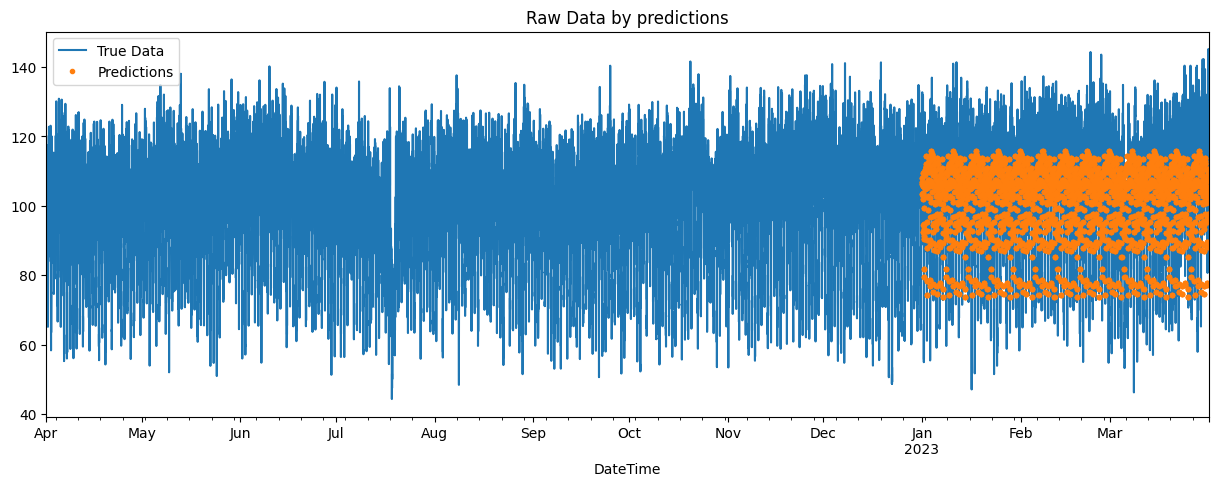

In [27]:
ax = df[['Power_MW']].plot(figsize = (15,5))
df[['predictions']].plot(ax=ax,style='.')
plt.legend(['True Data','Predictions'])
ax.set_title('Raw Data by predictions')
plt.show()

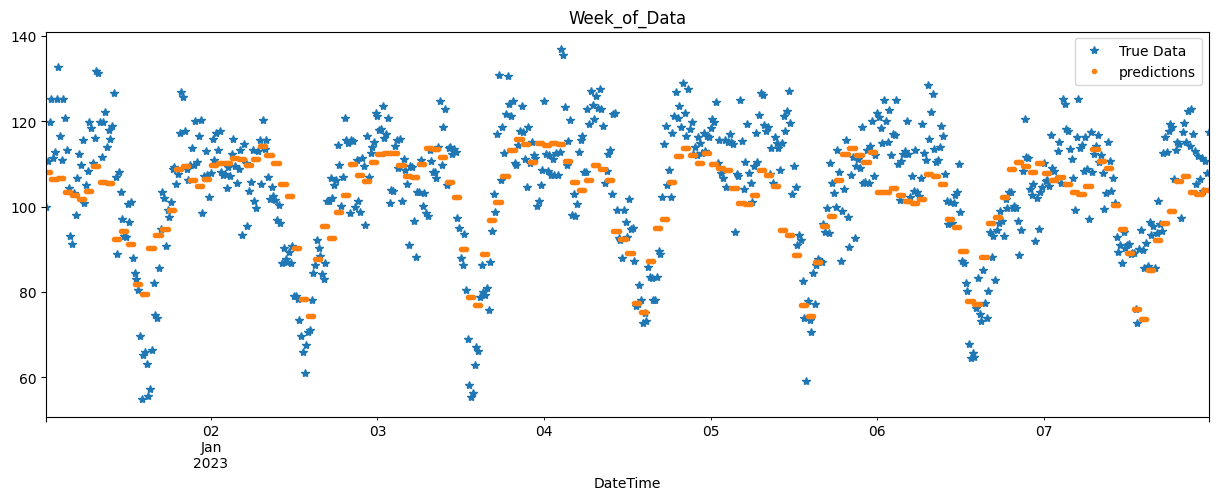

In [28]:
ax = df.loc[(df.index>'01-01-2023') & (df.index<'01-08-2023')]['Power_MW'].plot(figsize=(15,5),style='*',title = 'Week_of_Data')
df.loc[(df.index>'01-01-2023') & (df.index<'01-08-2023')]['predictions'].plot(style ='.')
plt.legend(['True Data','predictions'])
plt.show()

In [29]:
np.sqrt(mean_squared_error(test['Power_MW'],test['predictions']))

11.428341722429023

In [30]:
test['predictions']

DateTime
2023-01-01 00:00:00    108.169815
2023-01-01 00:15:00    108.169815
2023-01-01 00:30:00    108.169815
2023-01-01 00:45:00    108.169815
2023-01-01 01:00:00    106.385902
                          ...    
2023-03-31 22:45:00    108.186722
2023-03-31 23:00:00    110.256927
2023-03-31 23:15:00    110.256927
2023-03-31 23:30:00    110.256927
2023-03-31 23:45:00    110.256927
Name: predictions, Length: 8640, dtype: float32

In [31]:
test[TARGET]-test['predictions']

DateTime
2023-01-01 00:00:00     6.160185
2023-01-01 00:15:00    -8.329815
2023-01-01 00:30:00     2.620185
2023-01-01 00:45:00    11.800185
2023-01-01 01:00:00    18.874098
                         ...    
2023-03-31 22:45:00    12.373278
2023-03-31 23:00:00     9.793073
2023-03-31 23:15:00     0.723073
2023-03-31 23:30:00    -7.566927
2023-03-31 23:45:00    -3.226927
Length: 8640, dtype: float64

In [32]:
test['error']=abs(test[TARGET]-test['predictions'])

In [33]:
test

,Date,Time,Power_MW,hour,dayofweek,quarter,month,year,dayofyear,predictions,error
DateTime,,,,,,,,,,,
2023-01-01 00:00:00,1-1-2023,00:00,114.33,0,6,1,1,2023,1,108.169815,6.160185
2023-01-01 00:15:00,1-1-2023,00:15,99.84,0,6,1,1,2023,1,108.169815,8.329815
2023-01-01 00:30:00,1-1-2023,00:30,110.79,0,6,1,1,2023,1,108.169815,2.620185
2023-01-01 00:45:00,1-1-2023,00:45,119.97,0,6,1,1,2023,1,108.169815,11.800185
2023-01-01 01:00:00,1-1-2023,01:00,125.26,1,6,1,1,2023,1,106.385902,18.874098
...,...,...,...,...,...,...,...,...,...,...,...
2023-03-31 22:45:00,3-31-2023,22:45,120.56,22,4,1,3,2023,90,108.186722,12.373278
2023-03-31 23:00:00,3-31-2023,23:00,120.05,23,4,1,3,2023,90,110.256927,9.793073
2023-03-31 23:15:00,3-31-2023,23:15,110.98,23,4,1,3,2023,90,110.256927,0.723073


In [34]:
test['date'] = test.index.date
test.groupby(['date'])['error'].mean().sort_values(ascending = True).head(5)

date
2023-01-31    6.214741
2023-02-14    6.220466
2023-03-16    6.282139
2023-03-11    6.430135
2023-03-03    6.549326
Name: error, dtype: float64

In [35]:
test.groupby(['date'])['error'].mean().sort_values(ascending = False).head(5)

date
2023-03-30    21.216856
2023-03-06    15.554859
2023-03-05    14.293644
2023-03-31    13.549016
2023-02-11    13.542087
Name: error, dtype: float64

part-2


Outlier Analysis and Removal

<Axes: ylabel='Frequency'>

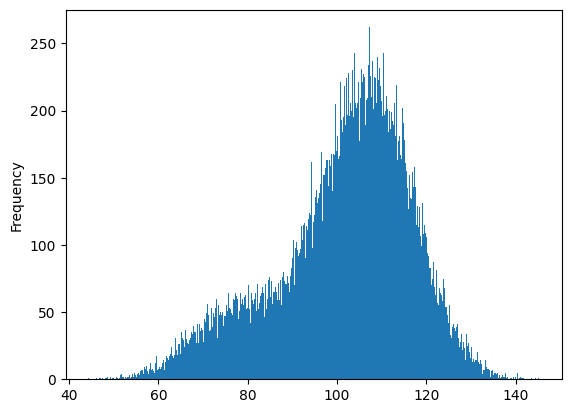

In [36]:
df['Power_MW'].plot(kind='hist',bins =500)

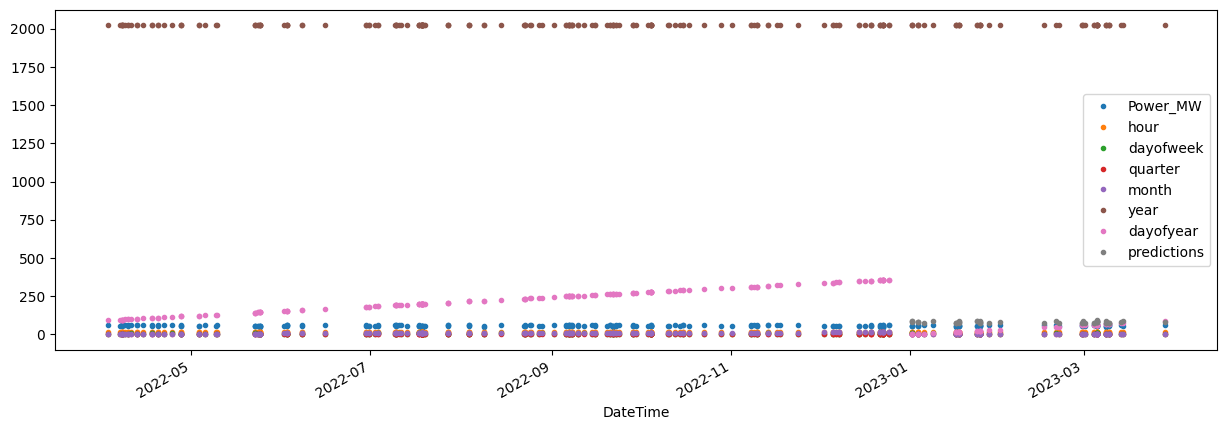

In [38]:
df.query('Power_MW<60').plot(figsize=(15,5),style = '.')
plt.show()

Time Seies Cross Validation


In [39]:
from sklearn.model_selection import TimeSeriesSplit

In [72]:
tss = TimeSeriesSplit(n_splits=3,test_size=24*365*1,gap = 24)
df = df.sort_index()

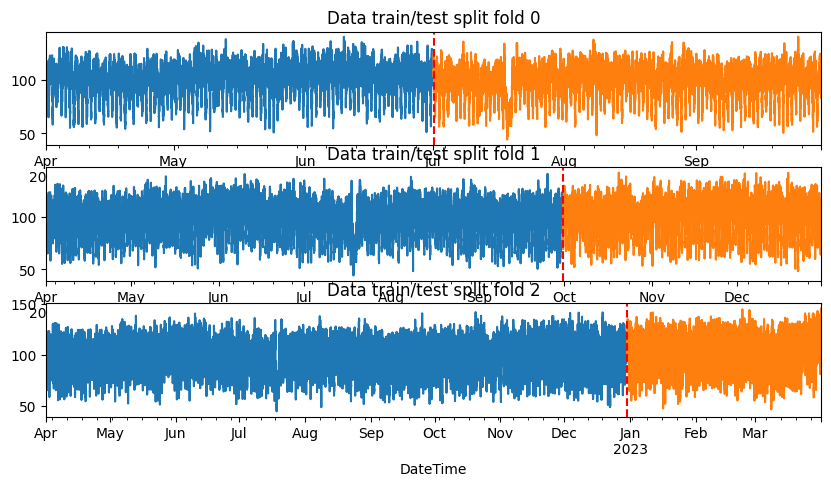

In [73]:
fig, axs = plt.subplots(3,1,figsize=(10,5))
fold = 0

for train_idx,val_idx in tss.split(df):
  train = df.iloc[train_idx]
  test = df.iloc[val_idx]
  train['Power_MW'].plot(ax=axs[fold],label='training_set',title=f'Data train/test split fold {fold}')
  test['Power_MW'].plot(ax=axs[fold],label='test_set')
  axs[fold].axvline(test.index.min(),color = 'red',ls='--')
  fold +=1
plt.show()

lag features

In [69]:
def add_lags(df):
  target_map = df['Power_MW'].to_dict()
  df['lag1']=(df.index-pd.Timedelta('364 days')).map(target_map)
  df['lag2']=(df.index-pd.Timedelta('728 days')).map(target_map)
  df['lag3']=(df.index-pd.Timedelta('1092 days')).map(target_map)
  return df



In [70]:
df=add_lags(df)

train using cross validation


In [63]:
df.head()

,Date,Time,Power_MW,hour,dayofweek,quarter,month,year,dayofyear,predictions,lag1,lag2,lag3
DateTime,,,,,,,,,,,,,
2022-04-01 00:00:00,4-1-2022,00:00,90.93,0,4,2,4,2022,91,NaN,NaN,NaN,NaN
2022-04-01 00:15:00,4-1-2022,00:15,94.97,0,4,2,4,2022,91,NaN,NaN,NaN,NaN
2022-04-01 00:30:00,4-1-2022,00:30,108.82,0,4,2,4,2022,91,NaN,NaN,NaN,NaN
2022-04-01 00:45:00,4-1-2022,00:45,112.58,0,4,2,4,2022,91,NaN,NaN,NaN,NaN
2022-04-01 01:00:00,4-1-2022,01:00,105.05,1,4,2,4,2022,91,NaN,NaN,NaN,NaN


In [64]:
df.tail()

,Date,Time,Power_MW,hour,dayofweek,quarter,month,year,dayofyear,predictions,lag1,lag2,lag3
DateTime,,,,,,,,,,,,,
2023-03-31 22:45:00,3-31-2023,22:45,120.56,22,4,1,3,2023,90,108.186722,116.16,NaN,NaN
2023-03-31 23:00:00,3-31-2023,23:00,120.05,23,4,1,3,2023,90,110.256927,110.95,NaN,NaN
2023-03-31 23:15:00,3-31-2023,23:15,110.98,23,4,1,3,2023,90,110.256927,113.94,NaN,NaN
2023-03-31 23:30:00,3-31-2023,23:30,102.69,23,4,1,3,2023,90,110.256927,114.56,NaN,NaN
2023-03-31 23:45:00,3-31-2023,23:45,107.03,23,4,1,3,2023,90,110.256927,110.01,NaN,NaN


In [74]:
tss = TimeSeriesSplit(n_splits=3,test_size=24*365*1,gap = 24)
df = df.sort_index()

fold =0
preds = []
scores = []
for train_idx,val_idx in tss.split(df):
  train = df.iloc[train_idx]
  test = df.iloc[val_idx]

  train = create_features(train)
  test = create_features(test)

  FEATURES = ['dayofyear','hour','dayofweek','quarter','month','year','lag1','lag2','lag3']
  TARGET = ['Power_MW']

  X_train = train[FEATURES]
  y_train = train[TARGET]

  X_test = test[FEATURES]
  y_test = test[TARGET]

  reg = xgb.XGBRegressor(base_score = 0.5,booster = 'gbtree',n_estimators = 1000, early_stopping_rounds = 50,objective = 'reg:linear',max_depth = 3,learning_rate=0.01)
  reg.fit(X_train,y_train,eval_set = [(X_train, y_train), (X_test, y_test)],verbose = 100)

  y_pred = reg.predict(X_test)
  preds.append(y_pred)
  score = np.sqrt(mean_squared_error(y_test,y_pred))
  scores.append(score)



[0]	validation_0-rmse:99.60873	validation_1-rmse:97.74804


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:55:44] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[100]	validation_0-rmse:37.49861	validation_1-rmse:35.56094
[200]	validation_0-rmse:16.05876	validation_1-rmse:14.39825
[300]	validation_0-rmse:10.01176	validation_1-rmse:10.09754
[400]	validation_0-rmse:8.78273	validation_1-rmse:9.89054
[403]	validation_0-rmse:8.76879	validation_1-rmse:9.89570
[0]	validation_0-rmse:98.70223	validation_1-rmse:101.75825


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:55:46] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[100]	validation_0-rmse:37.22882	validation_1-rmse:40.38496
[200]	validation_0-rmse:16.16859	validation_1-rmse:19.23214
[300]	validation_0-rmse:10.36514	validation_1-rmse:12.98910
[400]	validation_0-rmse:9.12654	validation_1-rmse:11.36846
[500]	validation_0-rmse:8.83413	validation_1-rmse:10.96457
[600]	validation_0-rmse:8.71731	validation_1-rmse:10.91534
[616]	validation_0-rmse:8.70582	validation_1-rmse:10.95703
[0]	validation_0-rmse:99.73950	validation_1-rmse:105.02672


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:55:48] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[100]	validation_0-rmse:37.63398	validation_1-rmse:43.22863
[200]	validation_0-rmse:16.38667	validation_1-rmse:21.74146
[300]	validation_0-rmse:10.56915	validation_1-rmse:14.67120
[400]	validation_0-rmse:9.39937	validation_1-rmse:12.71355
[500]	validation_0-rmse:9.14800	validation_1-rmse:11.93843
[600]	validation_0-rmse:9.05723	validation_1-rmse:11.63201
[700]	validation_0-rmse:8.99344	validation_1-rmse:11.47298
[800]	validation_0-rmse:8.93859	validation_1-rmse:11.42630
[900]	validation_0-rmse:8.86199	validation_1-rmse:11.41800
[959]	validation_0-rmse:8.82240	validation_1-rmse:11.41542


In [75]:
scores

[9.839556872909304, 10.834614147583604, 11.413804456616244]

In [76]:
print(f'scores across folds {np.mean(scores):0.4f}')
print(f'Fold scores :{scores}')

scores across folds 10.6960
Fold scores :[9.839556872909304, 10.834614147583604, 11.413804456616244]


Predicting the Future

In [77]:
#retrain on all the data
df =create_features(df)
FEATURES = ['dayofyear','hour','dayofweek','quarter','month','year','lag1','lag2','lag3']
TARGET = ['Power_MW']

X_all = df[FEATURES]
y_all = df[TARGET]

reg = xgb.XGBRegressor(base_score = 0.5,booster = 'gbtree',n_estimators = 600,objective = 'reg:linear',max_depth = 3,learning_rate=0.01)
reg.fit(X_all,y_all,eval_set = [(X_all, y_all)],verbose = 100)

[0]	validation_0-rmse:101.06377


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [21:11:15] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[100]	validation_0-rmse:38.14755
[200]	validation_0-rmse:16.63576
[300]	validation_0-rmse:10.74640
[400]	validation_0-rmse:9.50523
[500]	validation_0-rmse:9.23951
[599]	validation_0-rmse:9.13432


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=600, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

In [78]:
df.index.max()

Timestamp('2023-03-31 23:45:00')

Creating Future DataFrame

In [83]:
future = pd.date_range('2023-03-31','2024-03-31',freq = '15Min')
future_df = pd.DataFrame(index = future)
future_df['isFuture']=True
df['isFuture']=False
df_and_future = pd.concat([df,future_df])


In [84]:
df_and_future

,Date,Time,Power_MW,hour,dayofweek,quarter,month,year,dayofyear,predictions,lag1,lag2,lag3,isFuture
2022-04-01 00:00:00,4-1-2022,00:00,90.93,0.0,4.0,2.0,4.0,2022.0,91.0,NaN,NaN,NaN,NaN,False
2022-04-01 00:15:00,4-1-2022,00:15,94.97,0.0,4.0,2.0,4.0,2022.0,91.0,NaN,NaN,NaN,NaN,False
2022-04-01 00:30:00,4-1-2022,00:30,108.82,0.0,4.0,2.0,4.0,2022.0,91.0,NaN,NaN,NaN,NaN,False
2022-04-01 00:45:00,4-1-2022,00:45,112.58,0.0,4.0,2.0,4.0,2022.0,91.0,NaN,NaN,NaN,NaN,False
2022-04-01 01:00:00,4-1-2022,01:00,105.05,1.0,4.0,2.0,4.0,2022.0,91.0,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-30 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
2024-03-30 23:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
2024-03-30 23:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
2024-03-30 23:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


In [85]:
df_and_future = create_features(df_and_future)
df_and_future =add_lags(df_and_future)

In [86]:
future_with_features = df_and_future.query('isFuture').copy()

In [87]:
future_with_features

,Date,Time,Power_MW,hour,dayofweek,quarter,month,year,dayofyear,predictions,lag1,lag2,lag3,isFuture
2023-03-31 00:00:00,NaN,NaN,NaN,0,4,1,3,2023,90,NaN,90.93,NaN,NaN,True
2023-03-31 00:15:00,NaN,NaN,NaN,0,4,1,3,2023,90,NaN,94.97,NaN,NaN,True
2023-03-31 00:30:00,NaN,NaN,NaN,0,4,1,3,2023,90,NaN,108.82,NaN,NaN,True
2023-03-31 00:45:00,NaN,NaN,NaN,0,4,1,3,2023,90,NaN,112.58,NaN,NaN,True
2023-03-31 01:00:00,NaN,NaN,NaN,1,4,1,3,2023,90,NaN,105.05,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-30 23:00:00,NaN,NaN,NaN,23,5,1,3,2024,90,NaN,NaN,95.90,NaN,True
2024-03-30 23:15:00,NaN,NaN,NaN,23,5,1,3,2024,90,NaN,NaN,111.22,NaN,True
2024-03-30 23:30:00,NaN,NaN,NaN,23,5,1,3,2024,90,NaN,NaN,94.88,NaN,True
2024-03-30 23:45:00,NaN,NaN,NaN,23,5,1,3,2024,90,NaN,NaN,106.84,NaN,True


Predict the future

In [88]:
future_with_features['pred'] = reg.predict(future_with_features[FEATURES])

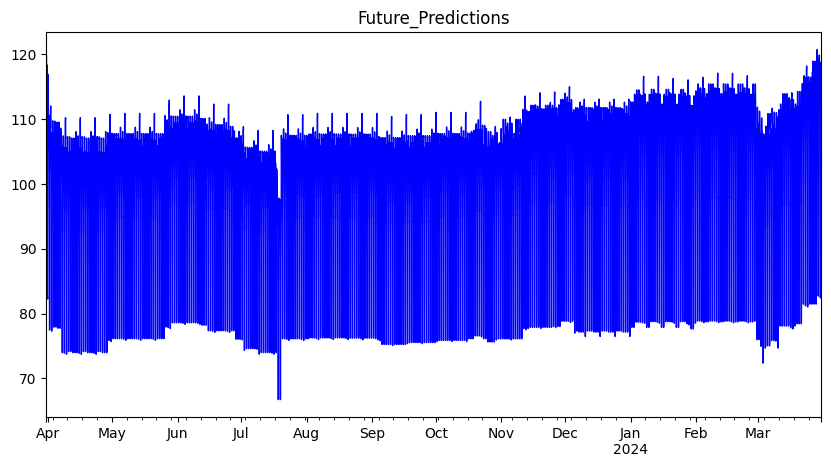

In [89]:
future_with_features['pred'].plot(figsize = (10,5),color ='blue', ms = 1,lw = 1, title = 'Future_Predictions')
plt.show()